In [261]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import scipy.optimize as op

In [4]:
data = np.genfromtxt('../data/raw/ex2data1.txt',delimiter=",")

In [197]:
X = data[:,0:2]
y = data[:,2:]
m = len(X)
X = np.hstack([np.ones((m,1)),X])
m , n = X.shape
initial_theta = np.zeros((n,1))
alpha =0.001

In [478]:
true_val = X[(y==1).reshape(100),:]
false_val = X[(y==0).reshape(100),:]

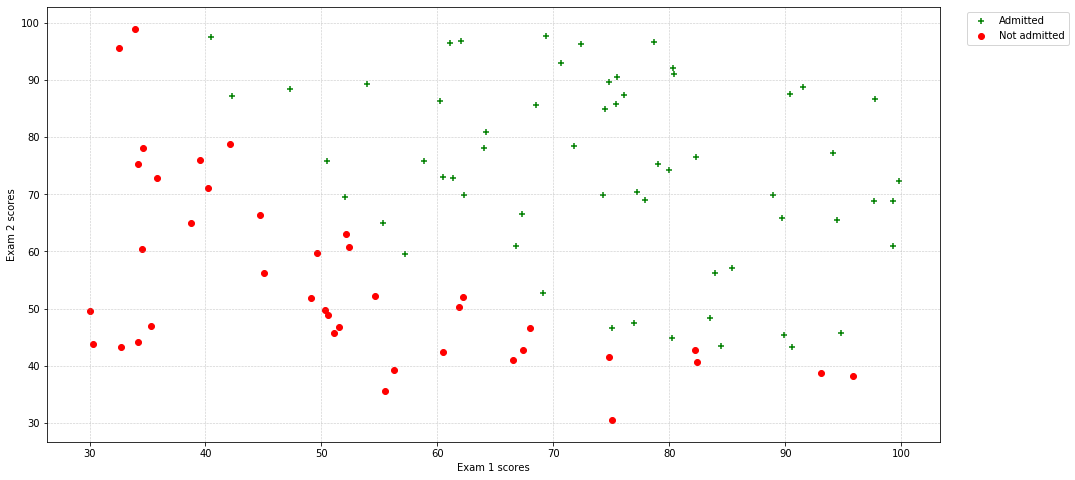

In [479]:
plt.figure(figsize=(16,8))
plt.scatter(true_val[:,1],true_val[:,2],marker='+',color='g')
plt.scatter(false_val[:,1],false_val[:,2],marker='o',color='r')
plt.xlabel('Exam 1 scores')
plt.ylabel('Exam 2 scores')
plt.legend(('Admitted', 'Not admitted'), bbox_to_anchor=(1.15, 1))
plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
plt.show();

### Sigmoid/Logistic function [g(z)]
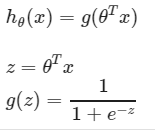

### Hypothesis
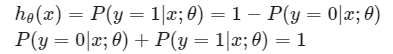

### Cost Function
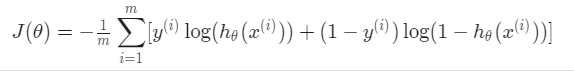

### Gradient Descent


In [527]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
   
def hypothesis(X, theta):
    return X @ theta

def cost(theta,X,y):
    m,n = X.shape
    hx = sigmoid(hypothesis(X,theta.reshape(len(theta),1)))
    J = np.sum((-y * np.log(hx)) - ((1-y) * np.log(1-hx))) * 1/m
    return J

def gradient(theta, X,y):
    m,n = X.shape
    hx = sigmoid(hypothesis(X,theta.reshape(len(theta),1)))
    g = ((hx - y).T @ X) * 1/m
    return g.flatten() if theta.ndim==1 else g

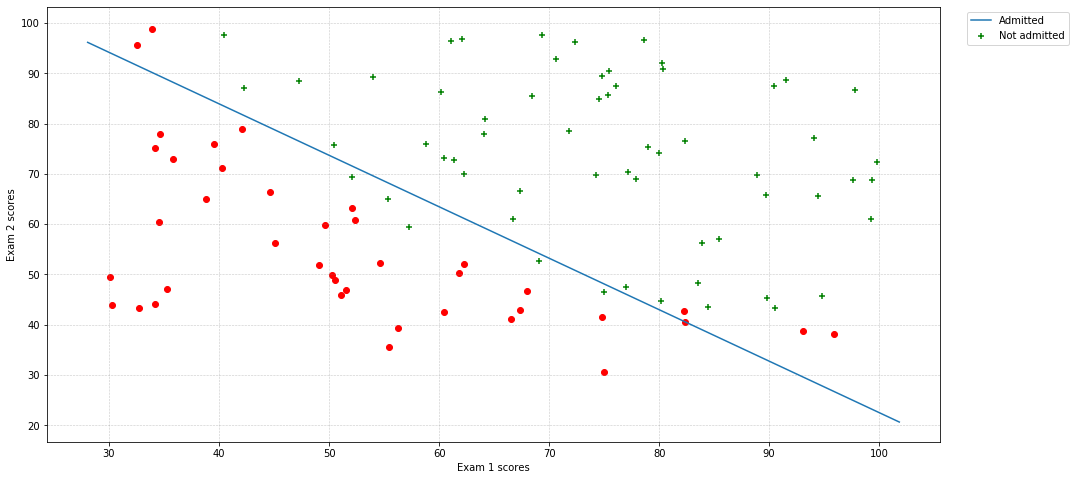

In [529]:
# theta = np.array([-25.16113549,   0.2062301 ,   0.20147003])
test_theta = np.array([-24, 0.2, 0.2]).reshape(3,1)
theta = op.minimize(fun=cost, x0=test_theta,args=(X,y), method='TNC',jac=gradient).x
plot_x = np.array([X[:,1].min() - 2, X[:,1].max() + 2]);
plot_y = (-1./theta[2]) * (theta[1] * plot_x + theta[0])

plt.figure(figsize=(16,8))
plt.scatter(true_val[:,1],true_val[:,2],marker='+',color='g')
plt.scatter(false_val[:,1],false_val[:,2],marker='o',color='r')
plt.plot(plot_x,plot_y)
plt.xlabel('Exam 1 scores')
plt.ylabel('Exam 2 scores')
plt.legend(('Admitted', 'Not admitted'), bbox_to_anchor=(1.15, 1))
plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
plt.show();